Pada kali ini aku akan mencoba untuk memprediksi apakah user-user yang sedang
mengunjungi website e-commerce dari suatu website akan mengklik banner promosi atau tidak
berdasarkan feature yang ada.

Ada pun feature-feature dalam data set ini adalah :
1. **‘Daily Time Spent on Site’** : lama waktu user mengunjungi site (menit)
2. **‘Age’** : usia user (tahun)
3. **‘Area Income’** : rata — rata pendapatan di daerah sekitar user
4. **‘Daily Internet Usage’** : rata — rata waktu yang dihabiskan user di internet dalam sehari (menit)
5. **‘Ad Topic Line’** : topik/konten dari promo banner
6. **‘City’** : kota dimana user mengakses website
7. **‘Male’** : apakah user adalah Pria atau bukan
8. **‘Country’** : negara dimana user mengakses website
9. **‘Timestamp’** : waktu saat user mengklik promo banner atau keluar dari halaman website tanpa mengklik banner
10. **‘Clicked on Ad’** : mengindikasikan user mengklik promo banner atau tidak (0 = tidak; 1 = klik).

In [2]:
#import library 
import pandas as pd

# Baca data 'ecommerce_banner_promo.csv'
data = pd.read_csv('./dataset/ecommerce_banner_promo.csv')

#1. Data eksplorasi dengan head(), info(), describe(), shape
print("[1] Data eksplorasi dengan head(), info(), describe(), shape")
print("Lima data teratas:")
print(data.head())
print("Informasi dataset:")
print(data.info())
print("Statistik deskriptif dataset:")
print(data.describe())
print("Ukuran dataset:")
print(data.shape)

[1] Data eksplorasi dengan head(), info(), describe(), shape
Lima data teratas:
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

         Timestamp  Clic

Jika dilihat dari data infonya, ternyata dataset ini sama sekali tidak memiliki nilai null. Jadi, kita bisa langsung masuk ke tahap selanjutnya.

In [3]:
#2. Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
print("[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()")
print(data.corr())

#3. Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
print("[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()")
print(data.groupby('Clicked on Ad').size())

[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.7

Setelah ku amati, ternyata korelasi antara variabel-variabelnya banyak yang tidak begitu kuat sehingga bisa menggunakan algorithm Logistic Regression untuk membuat modelnya.

Dan jumlah user yang melakukan klik dengan yang tidak melakukan klik memiliki jumlah yang seimbang, yaitu sama-sama berjumlah 500.

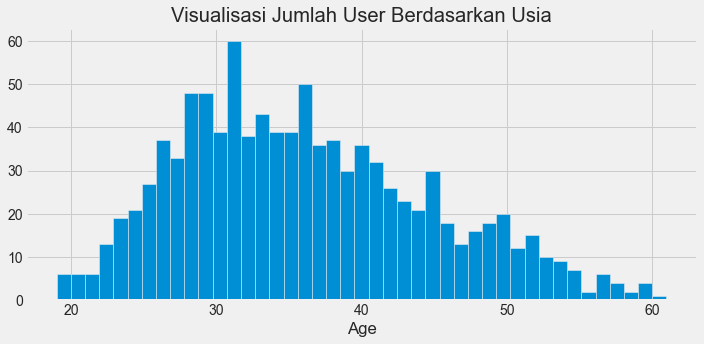

Menggambarkan hubungan setiap feature


<Figure size 432x288 with 0 Axes>

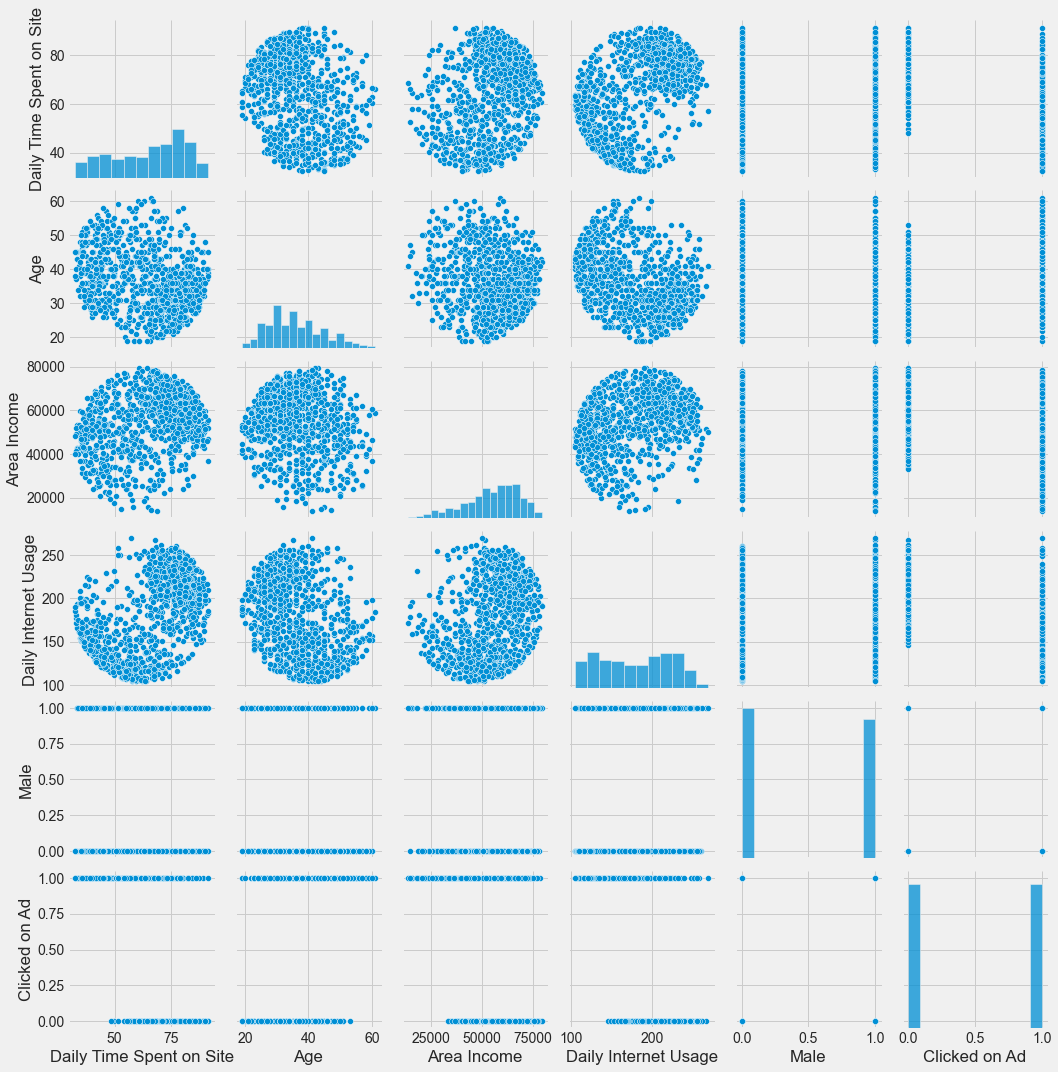

In [4]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

# Setting: matplotlib and seaborn
sns.set_style('whitegrid')  
plt.style.use('fivethirtyeight')

#4. Data eksplorasi dengan visualisasi
#4a. Visualisasi Jumlah user dibagi ke dalam rentang usia (Age) menggunakan histogram (hist()) plot
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins = data.Age.nunique())
plt.title('Visualisasi Jumlah User Berdasarkan Usia')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

#4b. Gunakan pairplot() dari seaborn (sns) modul untuk menggambarkan hubungan setiap feature.
print("Menggambarkan hubungan setiap feature")
plt.figure()
sns.pairplot(data)
plt.show()

Dari histogram yang sudah dibuat ini, bisa disimpulkan bahwa jumlah user yang paling banyak melakukan klik adalah yang usianya 31 tahun, disusul dengan user yang berusia 36 tahun. Jumlah user ini umumnya akan semakin berkurang untuk usia di atas 40 tahun.

In [5]:
#5. Cek missing value
print("[5] Cek missing value")
print(data.isnull().sum().sum())

[5] Cek missing value
0


Setelah melakukan eksplorasi data, aku akan mengecek apakah terdapat missing value dari data. Jika terdapat missing value, bisa diatasi dengan treatment seperti didrop. Jika tidak, maka bisa lanjutkan ke langkah berikutnya. Dan ternyata missing valuenya tidak ada.

In [6]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#6.Melakukan pemodelan dengan Logistic Regression, menggunakan perbandingan 80:20 untuk training vs testing
print("[6] Melakukan pemodelan dengan Logistic Regression, menggunakan perbandingan 80:20 untuk training vs testing")
#6a.Drop Non-Numerical (object type) feature from X, as Logistic Regression can only take numbers, and also drop Target/label, assign Target Variable to y.   
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

#6b. splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#6c. Modelling
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train,y_train)
# Prediksi model
y_pred = logreg.predict(X_test)

#6d. Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))

[6] Melakukan pemodelan dengan Logistic Regression, menggunakan perbandingan 80:20 untuk training vs testing
Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9


Dari teknis evaluasi permorfance yang sudak dilakukan ini, ternyata nilai accuracynya untuk data Training dan Testing adalah sama, yaitu 0.9. Tapi, aku masih belum mengetahui bagaimana performansi model jika menggunakan confusion matrix dan classification report.

In [7]:
# Import library
from sklearn.metrics import confusion_matrix, classification_report

#7. Print Confusion matrix dan classification report
print("[7] Print Confusion matrix dan classification report")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)

[7] Print Confusion matrix dan classification report
Confusion matrix:
[[85  4]
 [16 95]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



Berdasarkan hasil evaluasi yang sudah dilakukan, bisa disimpulkan bahwa model yang dibuat sudah sangat baik dalam memprediksi user yang akan mengklik website atau tidak. Hal tersebut dapat dilihat dari nilai accuracy = 0.90. Dimana dataset memiliki jumlah label yang seimbang (balance class), sehingga evaluasi performansi dapat menggunakan metrik Accuracy.